In [84]:
PATH = '/content/drive/MyDrive/Mineria de datos (1C-2024)/Classroom/Minería de Datos I 80096-2025-1C-Datos 22-División A-Día jueves/CLASE 3, 4'

In [2]:
file1 = '/insurance.csv'
file2 = '/onboarding_mp_metrics.csv'

In [ ]:
!pip list

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Panel Data

2 tipos de tablas -> corte transversal -> series de tiempo -> dato de panel

# dataframe onboarding

In [9]:
df = pd.read_csv(path+file2)

In [10]:
df

,Unnamed: 0,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
0,0,2022-01-30,4,MLB2883855850,0.0,NaN,1,2022-01-30,1,2022-01-30,0,NaN
1,1,2022-01-30,4,MLB7059024930,0.0,NaN,1,2022-03-02,0,NaN,0,NaN
2,2,2022-01-07,1,MLB4163269880,0.0,NaN,0,NaN,0,NaN,1,2022-01-08
3,3,2022-01-07,1,MLB7349806870,0.0,NaN,0,NaN,0,NaN,1,2022-01-08
4,4,2022-01-07,1,MLB7239064190,0.0,NaN,1,2022-01-07,0,NaN,1,2022-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,11495,2022-01-29 00:00:00,4,MLB5116611060,0.0,NaN,1,2022-01-28 00:00:00,0,NaN,1,2022-01-30 00:00:00
11496,11496,2022-01-14 00:00:00,2,MLB7984688360,1.0,2022-01-29 00:00:00,1,2022-01-22 00:00:00,1,2022-01-22 00:00:00,1,2022-01-15 00:00:00
11497,11497,2022-01-14 00:00:00,2,MLB6841893560,0.0,NaN,0,NaN,0,NaN,1,2022-02-03 00:00:00
11498,11498,2022-01-14 00:00:00,2,MLB7306508150,0.0,NaN,0,NaN,0,NaN,1,2022-01-15 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11500 non-null  int64  
 1   first_login_dt  11500 non-null  object 
 2   week_year       11500 non-null  int64  
 3   user_id         11500 non-null  object 
 4   habito          11001 non-null  float64
 5   habito_dt       1332 non-null   object 
 6   activacion      11500 non-null  int64  
 7   activacion_dt   5379 non-null   object 
 8   setup           11500 non-null  int64  
 9   setup_dt        4885 non-null   object 
 10  return          11500 non-null  int64  
 11  return_dt       8177 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [13]:
#!top #pueden ver el estado de la maquina virtual

/bin/bash: line 1: htop: command not found


In [26]:
type(df[['user_id', 'week_year']]) # para imprimir ciertas columnas, hay que determinarlas en una lista
type(df['activacion'])
1

1

In [28]:
df['user_id'].duplicated().sum()

np.int64(500)

In [30]:
df_duplicated = df[df['user_id'].duplicated() == True]

In [34]:
df_duplicated

,Unnamed: 0,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
11000,11000,2022-01-23 00:00:00,3,MLB10617732800,0.0,NaN,0,NaN,1,2022-01-23 00:00:00,1,2022-01-24 00:00:00
11001,11001,2022-01-23 00:00:00,3,MLB3507434700,0.0,NaN,0,NaN,0,NaN,0,NaN
11002,11002,2022-01-23 00:00:00,3,MLB2391267430,0.0,NaN,0,NaN,0,NaN,1,2022-01-24 00:00:00
11003,11003,2022-01-24 00:00:00,4,MLB2131264370,0.0,NaN,0,NaN,0,NaN,1,2022-02-06 00:00:00
11004,11004,2022-01-24 00:00:00,4,MLB351816120,0.0,NaN,0,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,11495,2022-01-29 00:00:00,4,MLB5116611060,0.0,NaN,1,2022-01-28 00:00:00,0,NaN,1,2022-01-30 00:00:00
11496,11496,2022-01-14 00:00:00,2,MLB7984688360,1.0,2022-01-29 00:00:00,1,2022-01-22 00:00:00,1,2022-01-22 00:00:00,1,2022-01-15 00:00:00
11497,11497,2022-01-14 00:00:00,2,MLB6841893560,0.0,NaN,0,NaN,0,NaN,1,2022-02-03 00:00:00
11498,11498,2022-01-14 00:00:00,2,MLB7306508150,0.0,NaN,0,NaN,0,NaN,1,2022-01-15 00:00:00


In [35]:
df[df['user_id'] == 'MLB10617732800']

,Unnamed: 0,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
1000,1000,2022-01-23,3,MLB10617732800,0.0,NaN,0,NaN,1,2022-01-23,1,2022-01-24
11000,11000,2022-01-23 00:00:00,3,MLB10617732800,0.0,NaN,0,NaN,1,2022-01-23 00:00:00,1,2022-01-24 00:00:00


In [36]:
#df.drop_duplicates()
col_fechas = ['first_login_dt','activacion_dt','habito_dt','setup_dt', 'return_dt']

In [37]:
type(col_fechas)

list

In [39]:
df[col_fechas]

,first_login_dt,activacion_dt,habito_dt,setup_dt,return_dt
0,2022-01-30,2022-01-30,NaN,2022-01-30,NaN
1,2022-01-30,2022-03-02,NaN,NaN,NaN
2,2022-01-07,NaN,NaN,NaN,2022-01-08
3,2022-01-07,NaN,NaN,NaN,2022-01-08
4,2022-01-07,2022-01-07,NaN,NaN,2022-01-08
...,...,...,...,...,...
11495,2022-01-29 00:00:00,2022-01-28 00:00:00,NaN,NaN,2022-01-30 00:00:00
11496,2022-01-14 00:00:00,2022-01-22 00:00:00,2022-01-29 00:00:00,2022-01-22 00:00:00,2022-01-15 00:00:00
11497,2022-01-14 00:00:00,NaN,NaN,NaN,2022-02-03 00:00:00
11498,2022-01-14 00:00:00,NaN,NaN,NaN,2022-01-15 00:00:00


In [42]:
df[col_fechas] = df[col_fechas].apply(lambda x: pd.to_datetime(x, format = 'mixed'))

In [43]:
df[col_fechas]

,first_login_dt,activacion_dt,habito_dt,setup_dt,return_dt
0,2022-01-30,2022-01-30,NaT,2022-01-30,NaT
1,2022-01-30,2022-03-02,NaT,NaT,NaT
2,2022-01-07,NaT,NaT,NaT,2022-01-08
3,2022-01-07,NaT,NaT,NaT,2022-01-08
4,2022-01-07,2022-01-07,NaT,NaT,2022-01-08
...,...,...,...,...,...
11495,2022-01-29,2022-01-28,NaT,NaT,2022-01-30
11496,2022-01-14,2022-01-22,2022-01-29,2022-01-22,2022-01-15
11497,2022-01-14,NaT,NaT,NaT,2022-02-03
11498,2022-01-14,NaT,NaT,NaT,2022-01-15


In [44]:
df

,Unnamed: 0,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
0,0,2022-01-30,4,MLB2883855850,0.0,NaT,1,2022-01-30,1,2022-01-30,0,NaT
1,1,2022-01-30,4,MLB7059024930,0.0,NaT,1,2022-03-02,0,NaT,0,NaT
2,2,2022-01-07,1,MLB4163269880,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
3,3,2022-01-07,1,MLB7349806870,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
4,4,2022-01-07,1,MLB7239064190,0.0,NaT,1,2022-01-07,0,NaT,1,2022-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,11495,2022-01-29,4,MLB5116611060,0.0,NaT,1,2022-01-28,0,NaT,1,2022-01-30
11496,11496,2022-01-14,2,MLB7984688360,1.0,2022-01-29,1,2022-01-22,1,2022-01-22,1,2022-01-15
11497,11497,2022-01-14,2,MLB6841893560,0.0,NaT,0,NaT,0,NaT,1,2022-02-03
11498,11498,2022-01-14,2,MLB7306508150,0.0,NaT,0,NaT,0,NaT,1,2022-01-15


In [47]:
df = df.drop_duplicates()

In [48]:
df

,Unnamed: 0,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
0,0,2022-01-30,4,MLB2883855850,0.0,NaT,1,2022-01-30,1,2022-01-30,0,NaT
1,1,2022-01-30,4,MLB7059024930,0.0,NaT,1,2022-03-02,0,NaT,0,NaT
2,2,2022-01-07,1,MLB4163269880,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
3,3,2022-01-07,1,MLB7349806870,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
4,4,2022-01-07,1,MLB7239064190,0.0,NaT,1,2022-01-07,0,NaT,1,2022-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,11495,2022-01-29,4,MLB5116611060,0.0,NaT,1,2022-01-28,0,NaT,1,2022-01-30
11496,11496,2022-01-14,2,MLB7984688360,1.0,2022-01-29,1,2022-01-22,1,2022-01-22,1,2022-01-15
11497,11497,2022-01-14,2,MLB6841893560,0.0,NaT,0,NaT,0,NaT,1,2022-02-03
11498,11498,2022-01-14,2,MLB7306508150,0.0,NaT,0,NaT,0,NaT,1,2022-01-15


In [50]:
df = df.drop(columns=['Unnamed: 0'])

In [51]:
df

,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
0,2022-01-30,4,MLB2883855850,0.0,NaT,1,2022-01-30,1,2022-01-30,0,NaT
1,2022-01-30,4,MLB7059024930,0.0,NaT,1,2022-03-02,0,NaT,0,NaT
2,2022-01-07,1,MLB4163269880,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
3,2022-01-07,1,MLB7349806870,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
4,2022-01-07,1,MLB7239064190,0.0,NaT,1,2022-01-07,0,NaT,1,2022-01-08
...,...,...,...,...,...,...,...,...,...,...,...
11495,2022-01-29,4,MLB5116611060,0.0,NaT,1,2022-01-28,0,NaT,1,2022-01-30
11496,2022-01-14,2,MLB7984688360,1.0,2022-01-29,1,2022-01-22,1,2022-01-22,1,2022-01-15
11497,2022-01-14,2,MLB6841893560,0.0,NaT,0,NaT,0,NaT,1,2022-02-03
11498,2022-01-14,2,MLB7306508150,0.0,NaT,0,NaT,0,NaT,1,2022-01-15


In [52]:
df = df.drop_duplicates()

In [53]:
df

,first_login_dt,week_year,user_id,habito,habito_dt,activacion,activacion_dt,setup,setup_dt,return,return_dt
0,2022-01-30,4,MLB2883855850,0.0,NaT,1,2022-01-30,1,2022-01-30,0,NaT
1,2022-01-30,4,MLB7059024930,0.0,NaT,1,2022-03-02,0,NaT,0,NaT
2,2022-01-07,1,MLB4163269880,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
3,2022-01-07,1,MLB7349806870,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
4,2022-01-07,1,MLB7239064190,0.0,NaT,1,2022-01-07,0,NaT,1,2022-01-08
...,...,...,...,...,...,...,...,...,...,...,...
10995,2022-01-16,2,MLB10582592440-1,0.0,NaT,1,2022-01-17,1,2022-01-17,1,2022-01-15
10996,2022-01-09,1,MLB10486576200-1,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
10997,2022-01-09,1,MLB914507930-1,0.0,NaT,0,NaT,0,NaT,1,2022-01-08
10998,2022-01-23,3,MLB1647321400-1,0.0,NaT,1,2022-01-13,0,NaT,1,2022-01-22


# estadistica

In [62]:
edades = np.array([1, 1, 1,22,22,22,24,29,50,189])

In [55]:
type(edades)

numpy.ndarray

<ipython-input-63-4ff755a37fdb>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(edades, labels = ['edades'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ab6d0000590>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab6d0001cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab6cfffbb10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab6d0003490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab6d0003f50>],
 'means': []}

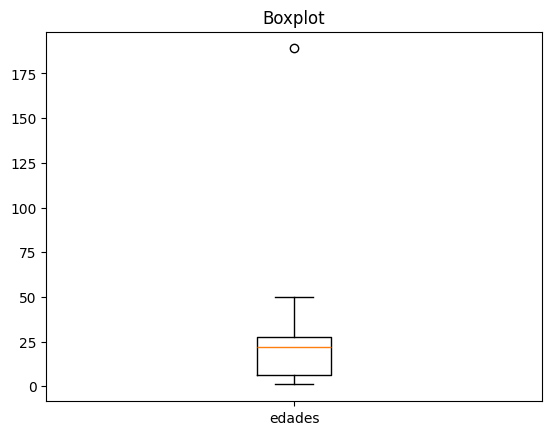

In [63]:
fig, ax = plt.subplots()
ax.set_title('Boxplot')
ax.boxplot(edades, labels = ['edades'])

In [67]:
q1 = np.quantile(edades, 0.25)

In [69]:
q3 = np.quantile(edades, 0.75)
q3

np.float64(27.75)

In [70]:
iqr = q3 - q1

In [72]:
sup = q3 + iqr * 1.5
inf = q1 - iqr * 1.5

(np.float64(60.0), np.float64(-26.0))

In [77]:
outliers_indices = np.where((edades > sup) | (edades < inf))

In [78]:
outliers_indices

(array([9]),)

In [79]:
edades = np.delete(edades, outliers_indices)

In [80]:
edades

array([ 1,  1,  1, 22, 22, 22, 24, 29, 50])

<ipython-input-81-4ff755a37fdb>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(edades, labels = ['edades'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ab6cce29950>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab6ccc56290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab6cce164d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab6ccc57d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab6ccc97250>],
 'means': []}

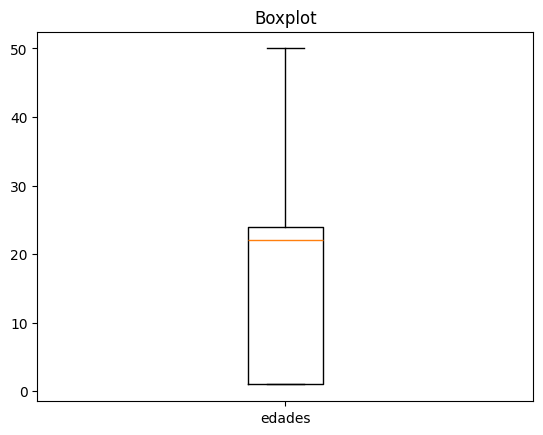

In [81]:
fig, ax = plt.subplots()
ax.set_title('Boxplot')
ax.boxplot(edades, labels = ['edades'])

# dataframe medical

In [85]:
df = pd.read_csv(PATH+file1)

In [86]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

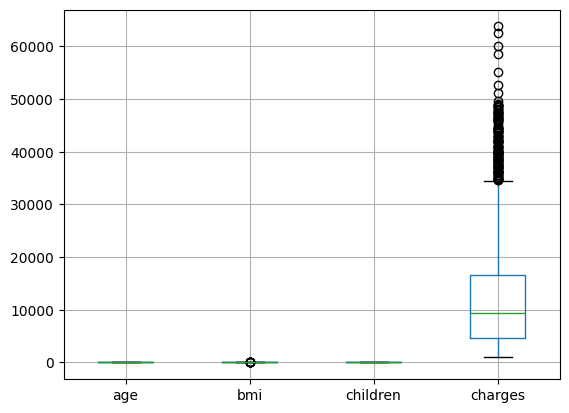

In [88]:
df.boxplot()

<Axes: >

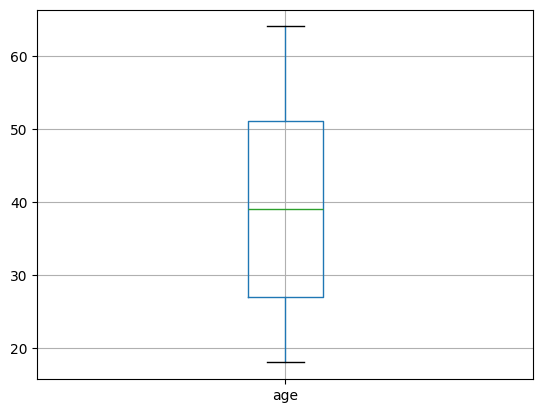

In [89]:
df.boxplot('age')

<Axes: >

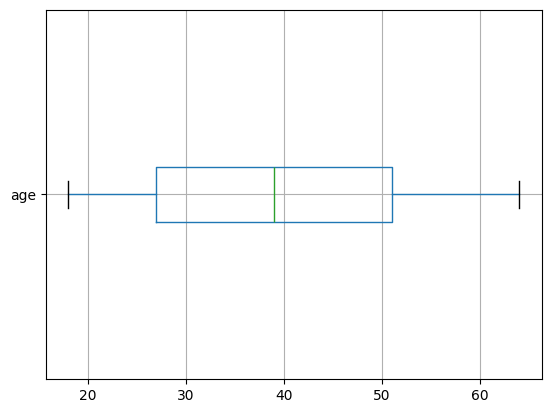

In [90]:
df.boxplot('age', vert=False)

In [91]:
numeric_columns = df.select_dtypes(include = ['int64', 'float64']).columns

In [93]:
numeric_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [96]:
for col in numeric_columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  sup = q3 + iqr * 1.5
  inf = q1 - iqr * 1.5
  outliers_indices = df[(df[col]>sup) | (df[col]<inf)].index
  df = df.drop(outliers_indices)

In [97]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [98]:
df_temp = df.copy() # backup

In [99]:
missing_data = df_temp.isnull().sum()
missing_data

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
